# Notebook per la gestione dei sensori di temperatura

Per prima cosa collegate la sonda Termometrica DS18B20 al pc tramite il cavo usb. Il sensore offre una rappresentazione a 12 bit della temperatura letta e comunica con Arduino tramite il protocollo 1-Wire. Il codice dello Sketch per Arduino Uno è disponibile nel repository Git della scuola. Per eseguire una cella di codice è sufficiente selezionarla con il mouse e premere CTRL+INVIO.

<a href="https://datasheets.maximintegrated.com/en/ds/DS18B20.pdf"> Qui </a> potete scaricare il datasheet del sensore utilizzato.




In [1]:
import serial
import serial.tools.list_ports
import time

Dopo aver caricato i moduli per la gestione della seriale possiamo enumerare le porte. Se non sono presenti altre schede Arduino, la porta seriale sarà quasi sicuramente /dev/ttyUSB0

In [5]:
com_ports=serial.tools.list_ports.comports()
for p in com_ports:
    print(p.device)

/dev/ttyUSB0


Data la bassa frequenza di aggiornamento della  temperatura, l'interfaccia seriale della scheda Arduino è impostata a 9600bps. L'istruzione seguente apre la porta seriale ed inizia una comunicazione con Arduino a 9600bps, nel caso in cui lo sketch sia stato modificato sarà necessario aggioranre la frequenza di trasmissione dati.

In [2]:
arduino = serial.Serial('/dev/ttyUSB0', baudrate=9600, timeout=1)

Prima di iniziare l'acquisizione dati, controlliamo che la scheda si attiva e risponda alle nostre sollecitazioni. La funzione Handshake, invia il carattere h ed aspetta una risposta da Arduino. Se la connessione è attiva e funzionante, dovreste ottenere come risposta il carattere R

In [3]:
def handshake_arduino(arduino, sleep_time=1):
    time.sleep(sleep_time);
    timeout = arduino.timeout
    arduino.timeout = 2
    arduino.write('h'.encode())
    while (arduino.in_waiting < 0):
        pass
    response= arduino.read_until()
    print(response.decode().strip())
    arduino.timeout = timeout




handshake_arduino(arduino)

R


La funzione parse_raw_line, legge una linea di input fornita da Arduino, suddivide il testo in due dati, e converte il tempo da millisecondi a secondi

In [4]:
def parse_raw_line(raw_line):
    raw_line = raw_line.decode()
    if raw_line[-1] != "\n":
        raise ValueError(
            "Il messaggio inviato da Arduino deve terminare con il carattere nuova linea."
        )

    time,temp= raw_line.rstrip().split(",");

    return float(time)/1000.,float(temp)

Definisco due liste times=[] e temps=[] che conterranno i dati letti dall'interfaccia di Arduino

In [5]:
times = []
temps= []
def daq_get_values(time_base=0):
    # invio il codice per la lettura di una temperatura
    arduino.write('t'.encode())
    
    while arduino.in_waiting < 0:
        pass

    # Leggo i dati inviati tramite seriale a seguito della richiesta di lettura
    raw = arduino.read_until()
      
    # Elaboro i dati forniti, traslando il tempo iniziale 
    try:
        time,temp=parse_raw_line(raw)
        times.append(time-time_base)
        temps.append(temp)
        
    except:
        pass

Controllo il corretto funzionamento del sistema richiedendo la lettura di una temperatura

In [6]:
times = []
temps= []

daq_get_values()
print(times)
print(temps)


[6.437]
[22.0]


Carico Matplotlib per la rappresentazione dei dati 

In [3]:
import matplotlib.pyplot as plt 

%matplotlib widget
plt.rcParams['animation.html']='jshtml'


La funzione getData accetta come input il numero di secondi per cui dovrà durare la cattura dati, durante la lettura dell'interfaccia, aggiorno il grafico dell'andamento

In [8]:
def getData(run_time):
        
        arduino.write('n'.encode())
        time.sleep(1);
        arduino.write('r'.encode())
        time.sleep(1);
        #pulisco il buffer seriale
        arduino.read_all()
        daq_get_values()
        run=True
             
        while run:
            
            daq_get_values()
            plt.plot(times,temps,'-')
            fig.canvas.draw()
            time.sleep(0.5)
            if times[-1]-times[0]>run_time:
                run=False
                print(times)



### Funzione per la rappresentazione grafica dei dati


La funzione new_figure deve essere invocata ogni volta in cui viene creata una nuova figura in cui i dati devono essere rappresentanti

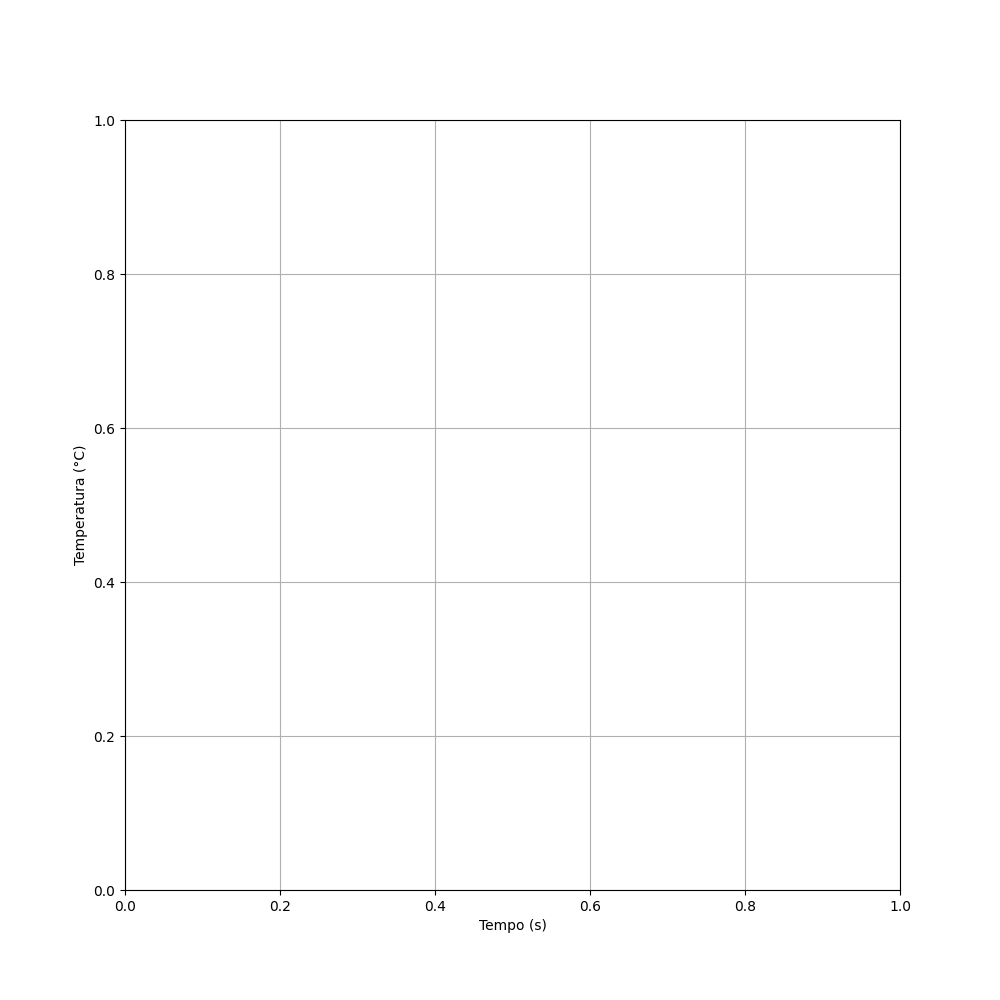

In [4]:
def new_figure():
    fig=plt.figure(figsize=[10,10])
    plt.grid()
    plt.xlabel('Tempo (s)')
    plt.ylabel('Temperatura (°C)')
    #plt.rcParams['figure.dpi'] = 150
    return fig
fig=new_figure()

In [10]:
times = []
temps= []
getData(10)

[1.281, 1.949, 3.258, 3.925, 4.593, 5.261, 5.928, 6.596, 7.263, 7.932, 8.6, 9.267, 9.935, 10.603, 11.27, 11.938]


In [5]:
#La funzione getData raccoglie dati ogni delta_t secondi per un tempo totale pari a run_time
#Ricorda di passare alla funzione la figura in cui vuoi che vengano disegnati i dati

def getData(run_time,delta_t,current_figure):
        
        arduino.write('n'.encode())
        time.sleep(1);
        arduino.write('r'.encode())
        time.sleep(1);
        #pulisco il buffer seriale
        arduino.read_all()
        daq_get_values()
        run=True
             
        while run:
            
            daq_get_values()
            plt.plot(times,temps,'-o',color='gray',markerfacecolor='red')
            current_figure.canvas.draw()
            time.sleep(delta_t)
            if times[-1]-times[0]>run_time:
                run=False
                print(times)



### Primo esercizio

Nella cella sottostante ricopia il codice per l'acquisizione dati e registra la temperatura iniziale dell'acqua presente all'interno del calorimetro. Visualizza una raccolta dati tenendo in mano la sonda termometrica.
Ricorda di inizializzare le variabili.

### Secondo esercizio

Misura la temperatura dell'acqua calda all'interno del cilindro graduato e dopo averla versata misura la temperatura di equilibrio all'intero del calorimetro. Ricorda di inizializzare le variabili.